In [1]:
import pickle
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pickle.load(open("simulation_results.pickle", "rb"))

In [3]:
parameters = {'network_size': [500, 1000, 1500, 2000], 
              'memory_size':  [32, 64, 96, 128, 160, 192, 224], 
              'prefferential_att': [2], 
              'code_length': [5], 
              'kappa': [0, 1, 5], 
              'gamma': [-1, 0, 1], 
              'lambda': [0], 
              'alpha': [0], 
              'omega': [0], 
              'T': 100, 
              'num_repetitions': 5, 
              'seed': 42, 
              'path_str': Path('experiments/experiment_1')}

params_cartesian_product = product(parameters['network_size'], parameters['memory_size'], 
                                   parameters['prefferential_att'], parameters['code_length'], 
                                   parameters['kappa'], parameters['gamma'], parameters['lambda'], 
                                   parameters['alpha'], parameters['omega'])

params_cartesian_product = list(params_cartesian_product)

#kappa idx 4
#gamma idx 5
params_cartesian_product[0]

(500, 32, 2, 5, 0, -1, 0, 0, 0)

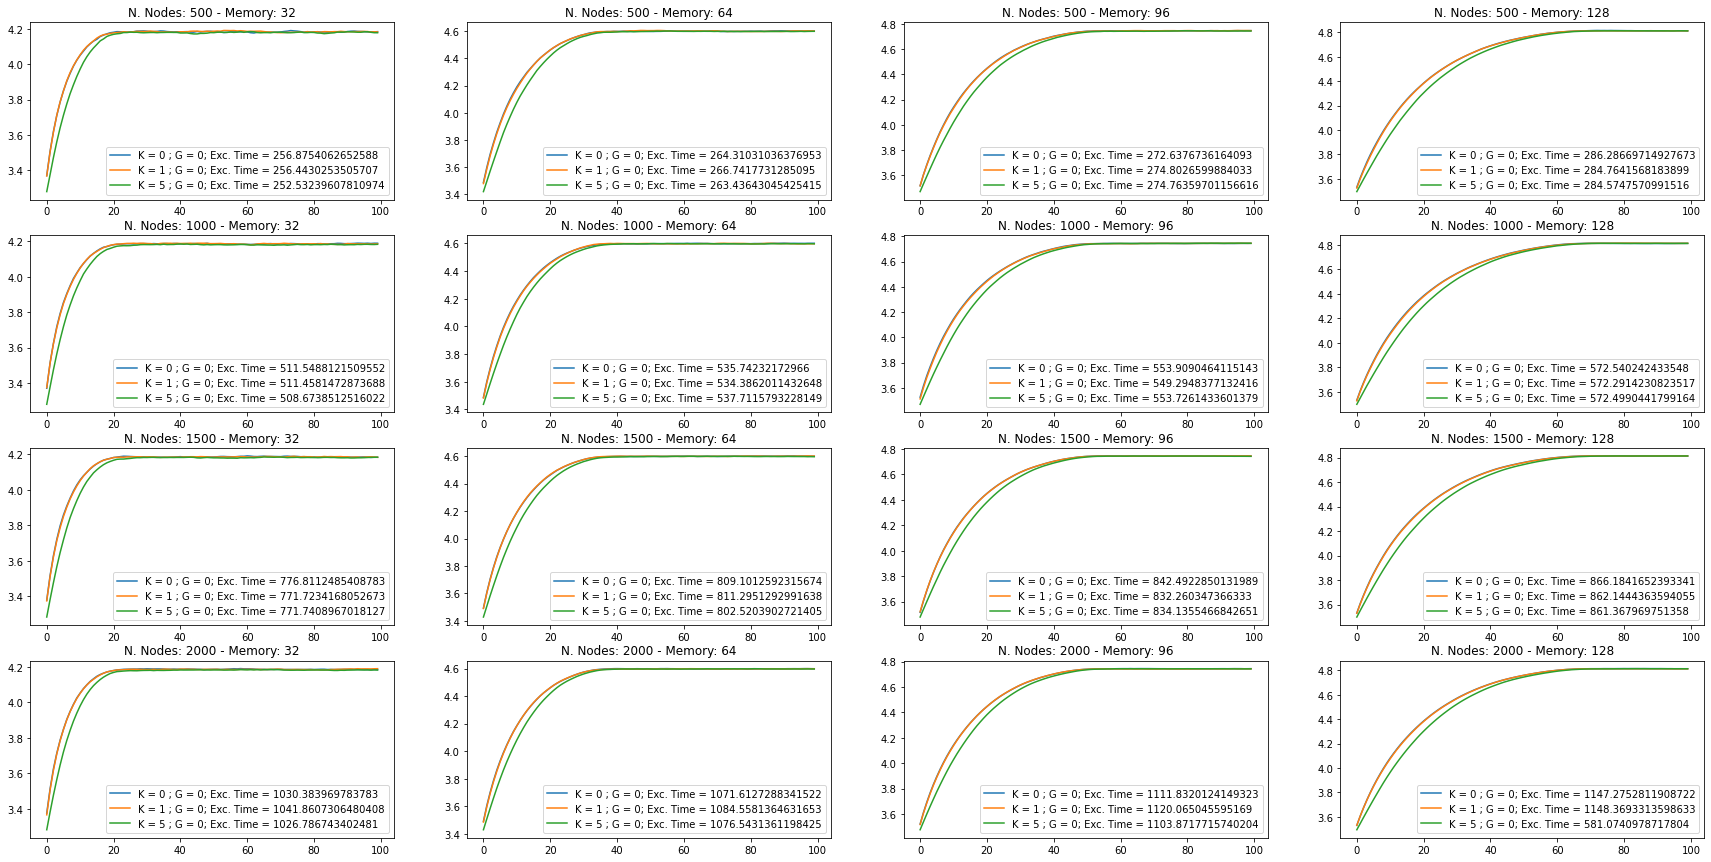

In [9]:
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 15))

network_size = [500, 1000, 1500, 2000]
memory_size = parameters['memory_size']
kappa = [0, 1, 5]
gamma = [0]

for i in range(4):
    for j in range(4):
        ax = axs[i][j]
        
        for k, g in product(kappa, gamma):
            params = (network_size[i], memory_size[j], 2, 5, k, g, 0, 0, 0)
            execution_time = results[params][1]
            mean_entropy = results[params][0]['Entropy']
            X = range(len(mean_entropy))

            ax.plot(X, mean_entropy, label = f"K = {k} ; G = {g}; Exc. Time = {execution_time}")

        ax.set_title(f"N. Nodes: {network_size[i]} - Memory: {memory_size[j]}")
        ax.legend()

In [45]:
import seaborn as sns
sns.set_context("poster")

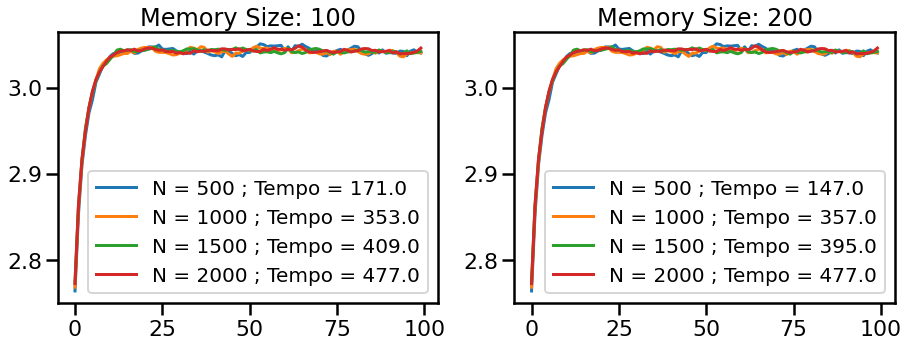

In [53]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

network_size = [500, 1000, 1500, 2000]
memory_size = [100, 200]
kappa = [-1, 0, 1]
gamma = [-1, 0, 1]

for i in range(4):
    for j in range(2):
        ax = axs[j]
        
        params = (network_size[i], memory_size[j], 2, 5, 0, 0, 0, 0, 0)
        execution_time = results[params][1]
        mean_entropy = results[params][0]['Entropy']
        X = range(len(mean_entropy))

        ax.plot(X, mean_entropy, label = f"N = {network_size[i]} ; Tempo = {np.round(execution_time, 0)}", linewidth = 3)

        ax.set_title(f"Memory Size: {memory_size[j]}")
        ax.legend(fontsize = 20)

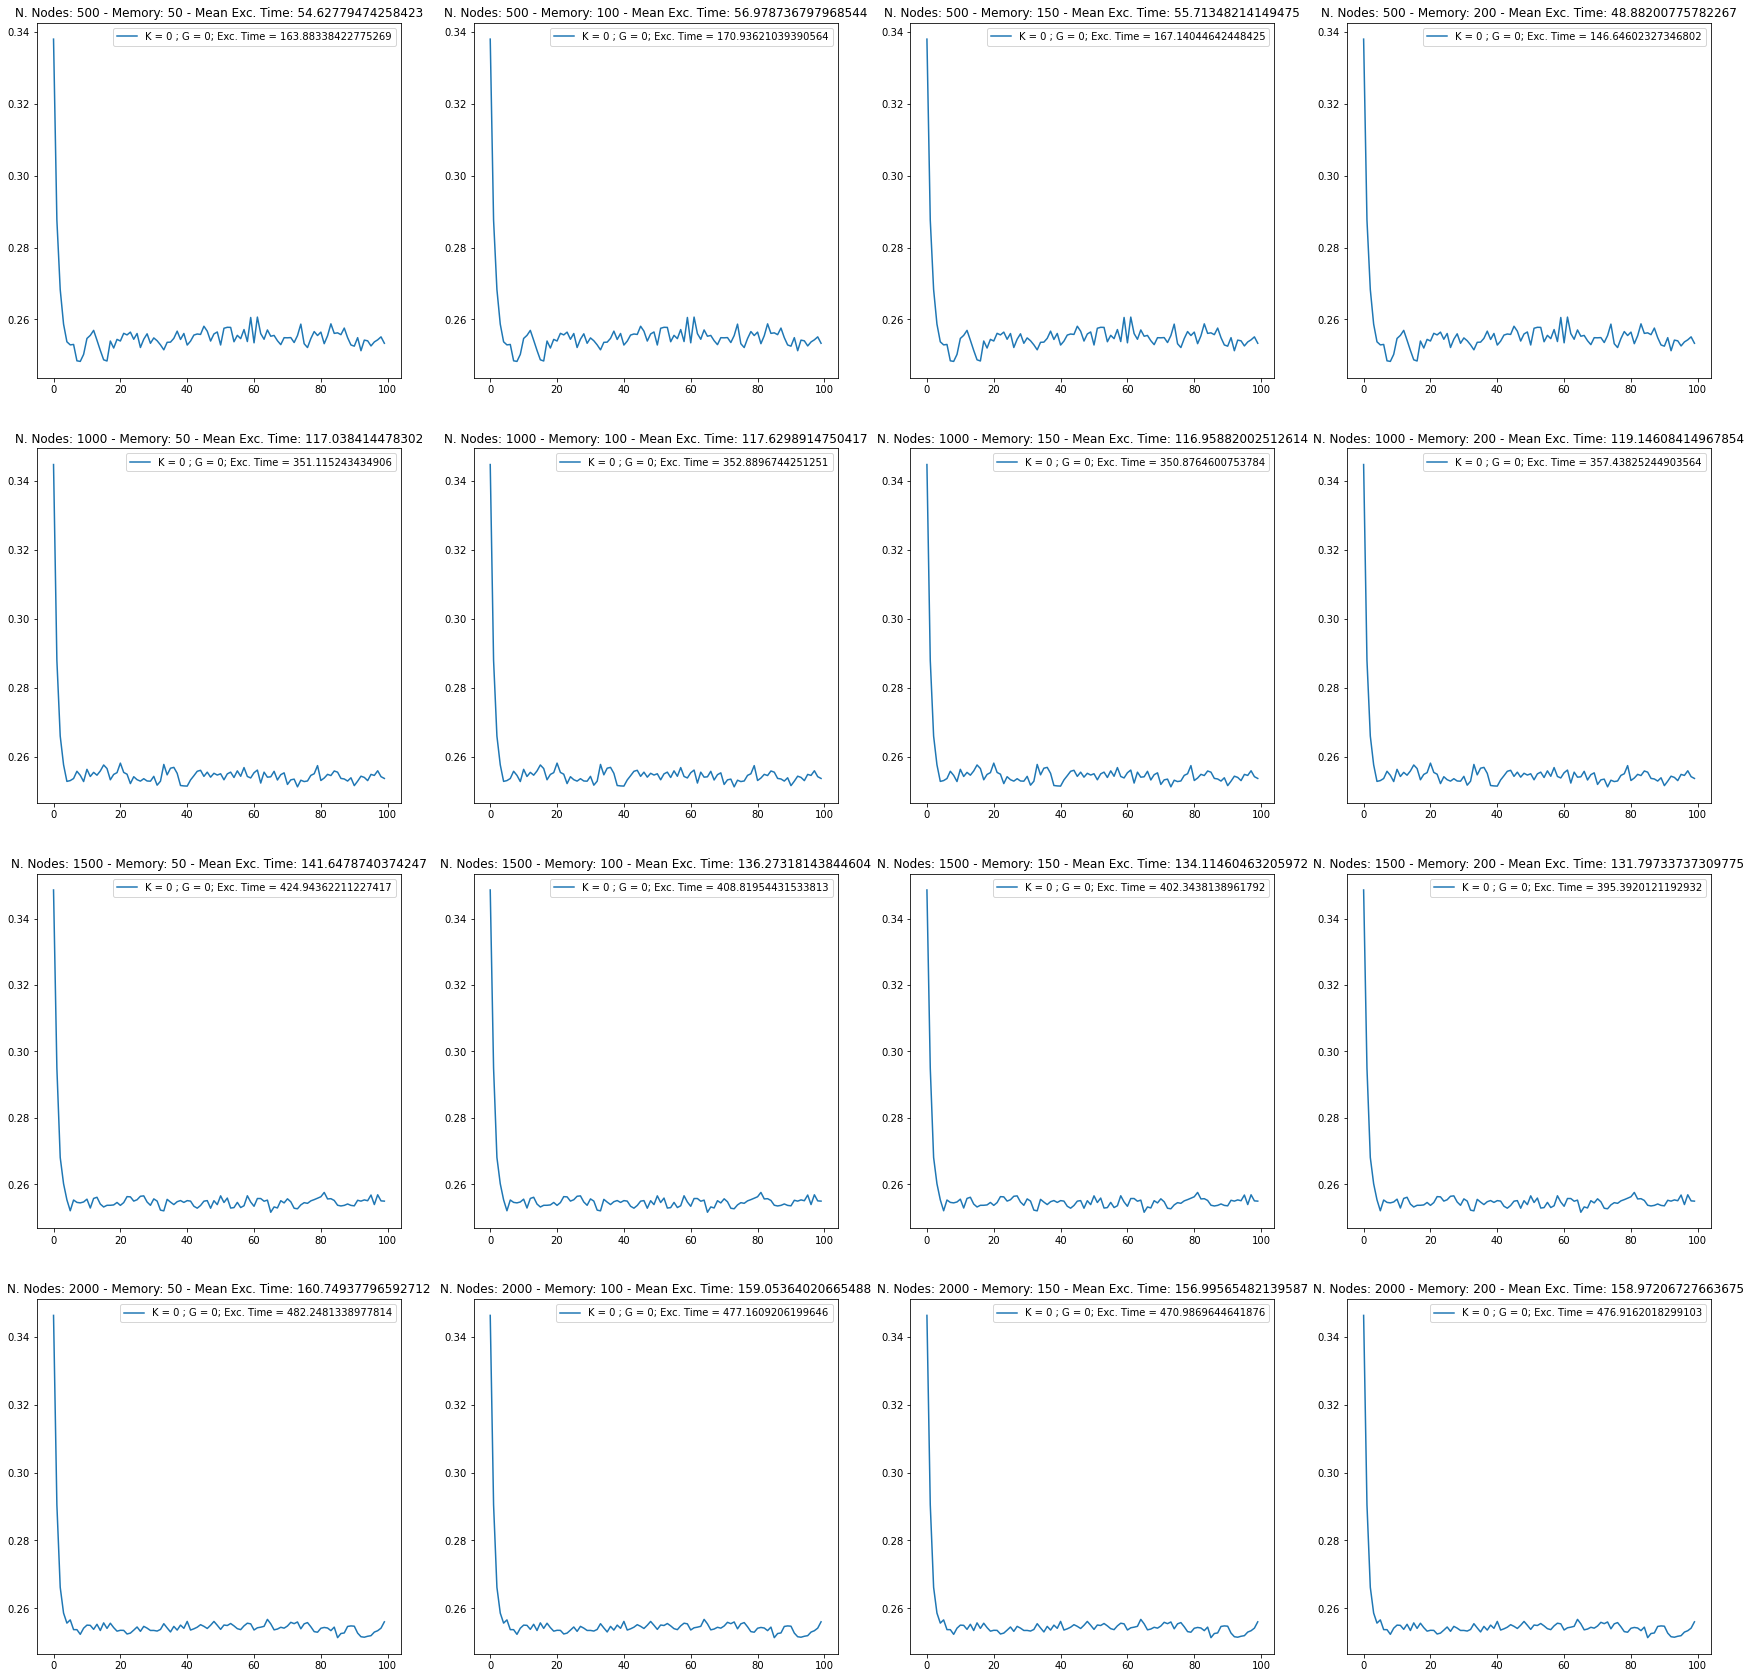

In [31]:
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 30))

network_size = [500, 1000, 1500, 2000]
memory_size = [50, 100, 150, 200]
kappa = [-1, 0, 1]
gamma = [-1, 0, 1]

for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        mean_execution_time = 0
        
        params = (network_size[i], memory_size[j], 2, 5, 0, 0, 0, 0, 0)
        execution_time = results[params][1]
        mean_execution_time += execution_time
        mean_entropy = results[params][0]['Proximity']
        X = range(len(mean_entropy))

        ax.plot(X, mean_entropy, label = f"K = {0} ; G = {0}; Exc. Time = {execution_time}")

        mean_execution_time /= 3
        ax.set_title(f"N. Nodes: {network_size[i]} - Memory: {memory_size[j]} - Mean Exc. Time: {mean_execution_time}")
        ax.legend()